# 캐글 api 사용준비

In [249]:
# kaggle api 사용준비
!pip install kaggle
!pip install kaggle-environments

In [250]:
# kaggle api 토큰 다운로드 완료 후 kaggle 불러오기 (cp kaggle.json ~/.kaggle/kaggle.json 로 kaggle.json 복사)
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi() # 캐글api 메소드 설정
api.authenticate()

In [251]:
# 해당 공모전 파일 리스트
# Signature: competitions_data_list_files(id, **kwargs)
api.competitions_data_list_files('titanic')

# 모든 파일 다운로드
# Signature: competition_download_files(competition, path=None, force=False, quiet=True)
api.competition_download_files('titanic')

# 1개의 파일 다운로드
# # Signature: competition_download_file(competition, file_name, path=None, force=False, quiet=False)
api.competition_download_file(competition = 'titanic',file_name = 'train.csv')
api.competition_download_file(competition = 'titanic',file_name = 'test.csv')
api.competition_download_file(competition = 'titanic',file_name = 'gender_submission.csv')

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


# 0. 기본세팅 및 라이브러리

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn') # plt를 seaborn scheme으로 사용하겠다
sns.set(font_scale = 2.5) # 폰트 크기 세팅

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# plotly 불러오기
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

# 1. 데이터 불러오기

In [253]:
# 데이터 불러오기
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [254]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [255]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [256]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 결측치 확인

In [257]:
# 훈련데이터
for col in df_train.columns:
    msg = 'column {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 
                                                                 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])
                                                                )
    print(msg)
    
# age(20%), Cabin(77%), Embarked (0.22%)의 결측치 확인
############################## 
# 메모
# {:.2f} =  소숫점 2자릿수 까지
# {:>10} = 오른쪽으로 정렬
# \t = tab
# 포멧문 https://pyformat.info/

column PassengerId	 Percent of NaN value: 0.00%
column   Survived	 Percent of NaN value: 0.00%
column     Pclass	 Percent of NaN value: 0.00%
column       Name	 Percent of NaN value: 0.00%
column        Sex	 Percent of NaN value: 0.00%
column        Age	 Percent of NaN value: 19.87%
column      SibSp	 Percent of NaN value: 0.00%
column      Parch	 Percent of NaN value: 0.00%
column     Ticket	 Percent of NaN value: 0.00%
column       Fare	 Percent of NaN value: 0.00%
column      Cabin	 Percent of NaN value: 77.10%
column   Embarked	 Percent of NaN value: 0.22%


In [258]:
for col in df_test.columns:
    msg = 'column {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                100 * (df_test[col].isnull().sum() / df_test[col].shape[0])
                                                                )
    print(msg)

# age(21%), Cabin(78%), Fare(0.24%) 결측치 확인

column PassengerId	 Percent of NaN value: 0.00%
column     Pclass	 Percent of NaN value: 0.00%
column       Name	 Percent of NaN value: 0.00%
column        Sex	 Percent of NaN value: 0.00%
column        Age	 Percent of NaN value: 20.57%
column      SibSp	 Percent of NaN value: 0.00%
column      Parch	 Percent of NaN value: 0.00%
column     Ticket	 Percent of NaN value: 0.00%
column       Fare	 Percent of NaN value: 0.24%
column      Cabin	 Percent of NaN value: 78.23%
column   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

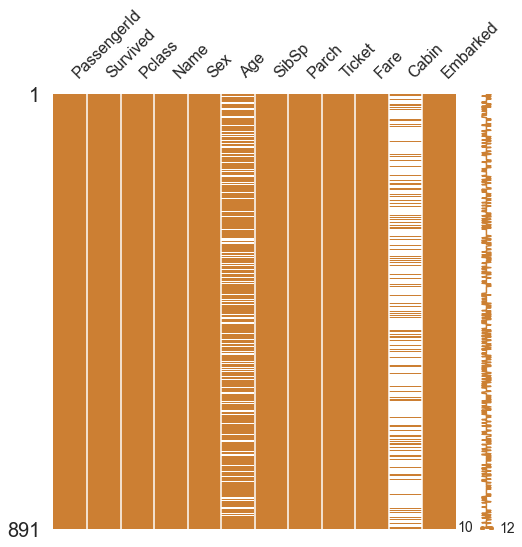

In [259]:
# MANO라이브러리를 사용하여 결측치의 존재를 시각화하기
msno.matrix(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8,0.5,0.2))

<AxesSubplot:>

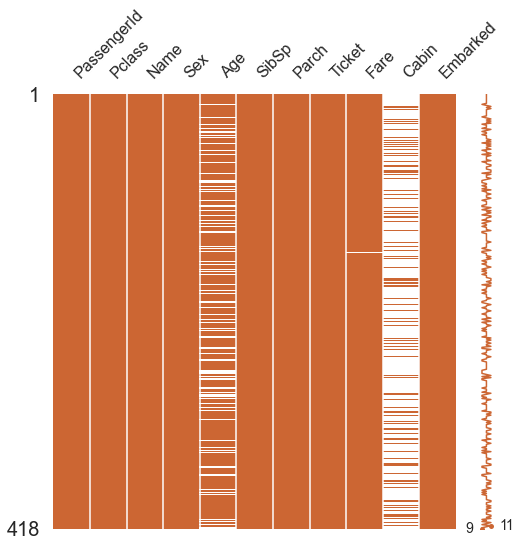

In [260]:
msno.matrix(df = df_test, figsize = (8,8), color = (0.8,0.4,0.2))

<AxesSubplot:>

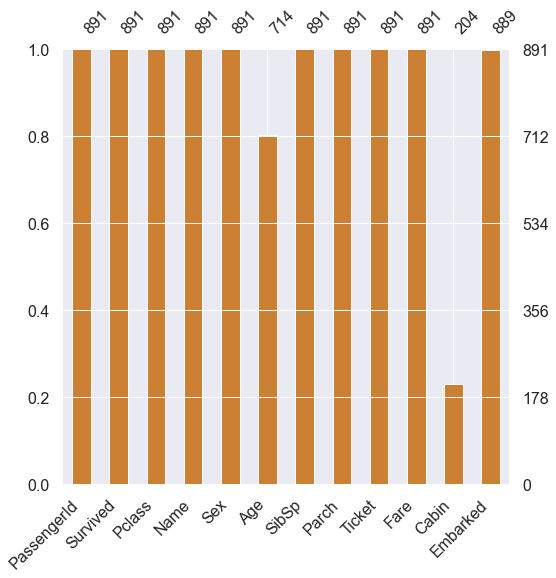

In [261]:
# bar형태의 시각화도 있음
msno.bar(df = df_train.iloc[:,:], figsize = (8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

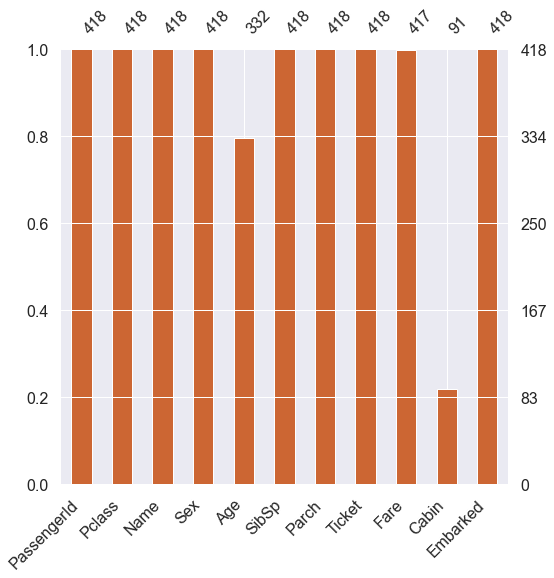

In [262]:
msno.bar(df_test, figsize = (8,8), color = (0.8,0.4,0.2))

## 1.2 타겟값 확인

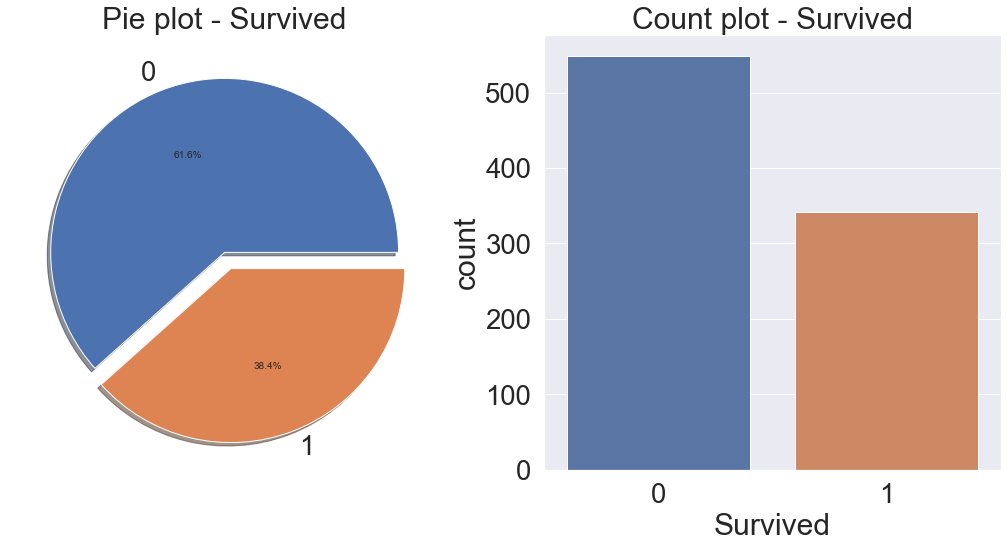

In [263]:
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax = ax[0],shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

목적: 타겟값의 데이터분포도 확인
1. 살아남은 사람 (Target = 1)은 38.4%
2. 타겟값의 분포가 꾀 균일함(Balanced)

# 2. EDA(Exploratory Data Analysis)

## 2.1 Pclass

- Pclass는 서수형데이터 (카테고리형태이지만, 순서가 있음)
- Pclass에 따른 생존률을 groupby와 pivot 메소드를 통해 확인

In [264]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [265]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [266]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

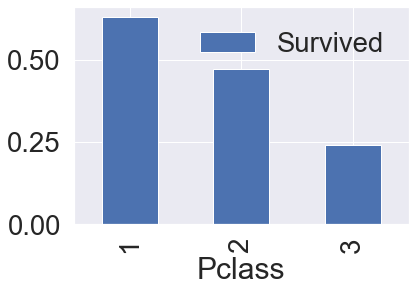

In [267]:
# 평균(mean)을 활용하여 클래스당 생존율 구하기
df_train[['Pclass','Survived']].groupby('Pclass', as_index = True).mean().sort_values('Survived', ascending=False).plot.bar()


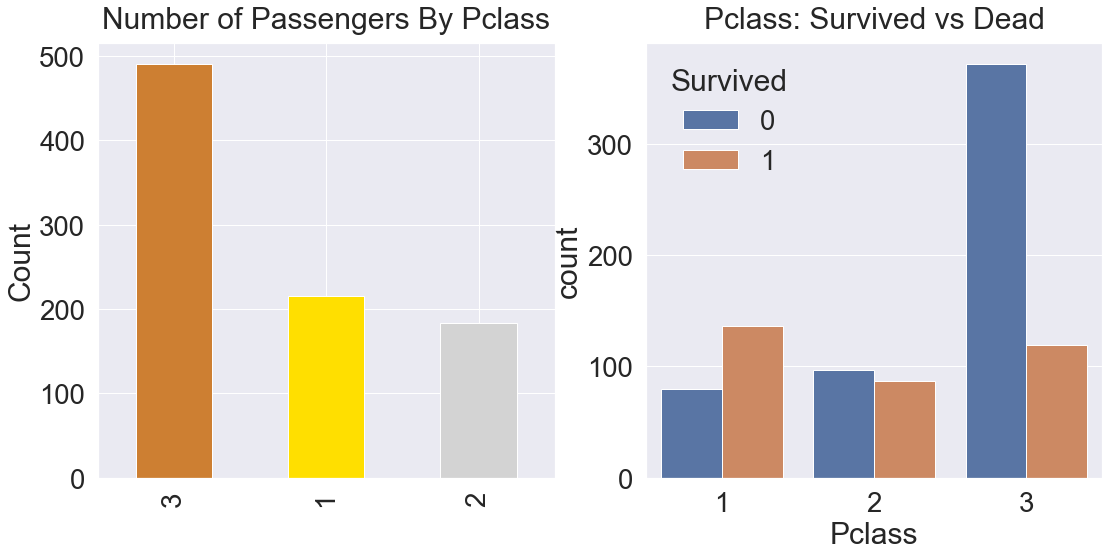

In [268]:
# Seaborn의 countplot을 통해 특정 Label에 따른 갯수를 확인해보자
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

목적: 'Pclass'별 승객수 분포와 생존률 비교
- Pclass가 높을수록 생존확율이 높다.
- 즉, Pclass가 생존율에 영향을 미친다고 생각할 수 있으니 나중에 모델설립시 사용해야한다고 판단

## 2.2 Sex

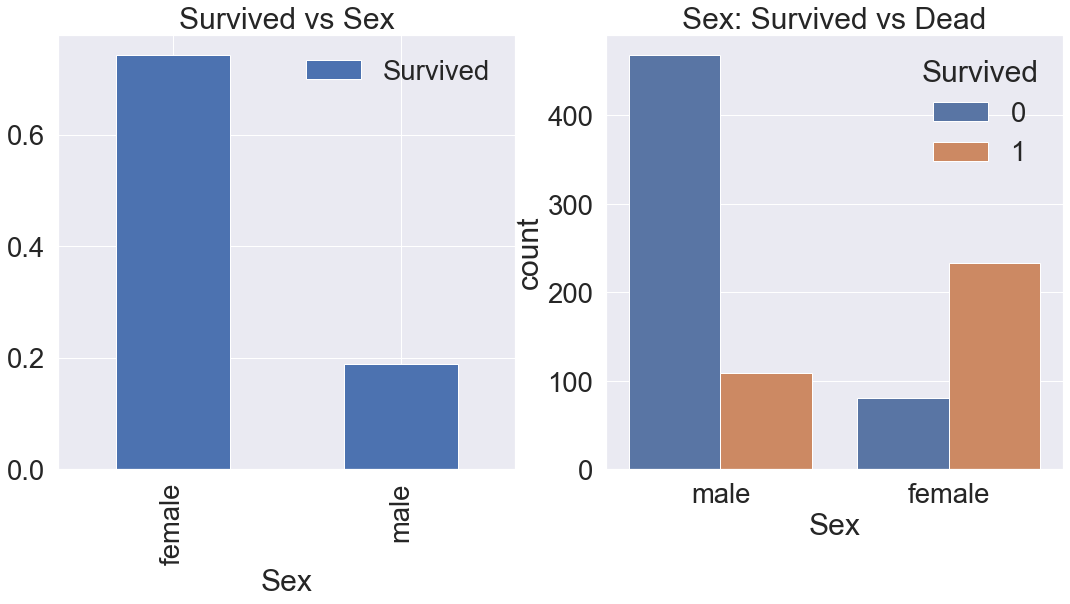

In [269]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex','Survived']].groupby('Sex', as_index = True).mean().sort_values('Survived', ascending = False).plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자의 생존율이 월등히 높다

In [270]:
df_train[['Sex','Survived']].groupby('Sex', as_index = True).mean().sort_values('Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [271]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로 Sex 또한 모델링시 중요한 Feature가 될 수 있다.

## 2.3 Both Sex and Pclass
- 'Sex'와 'Pclass' 두가지에 관하여 생존율 확인

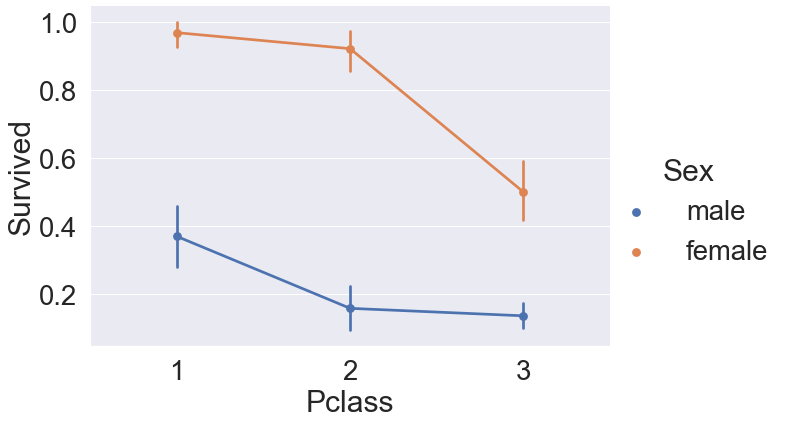

In [272]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = df_train,
               size = 6, aspect=1.5)

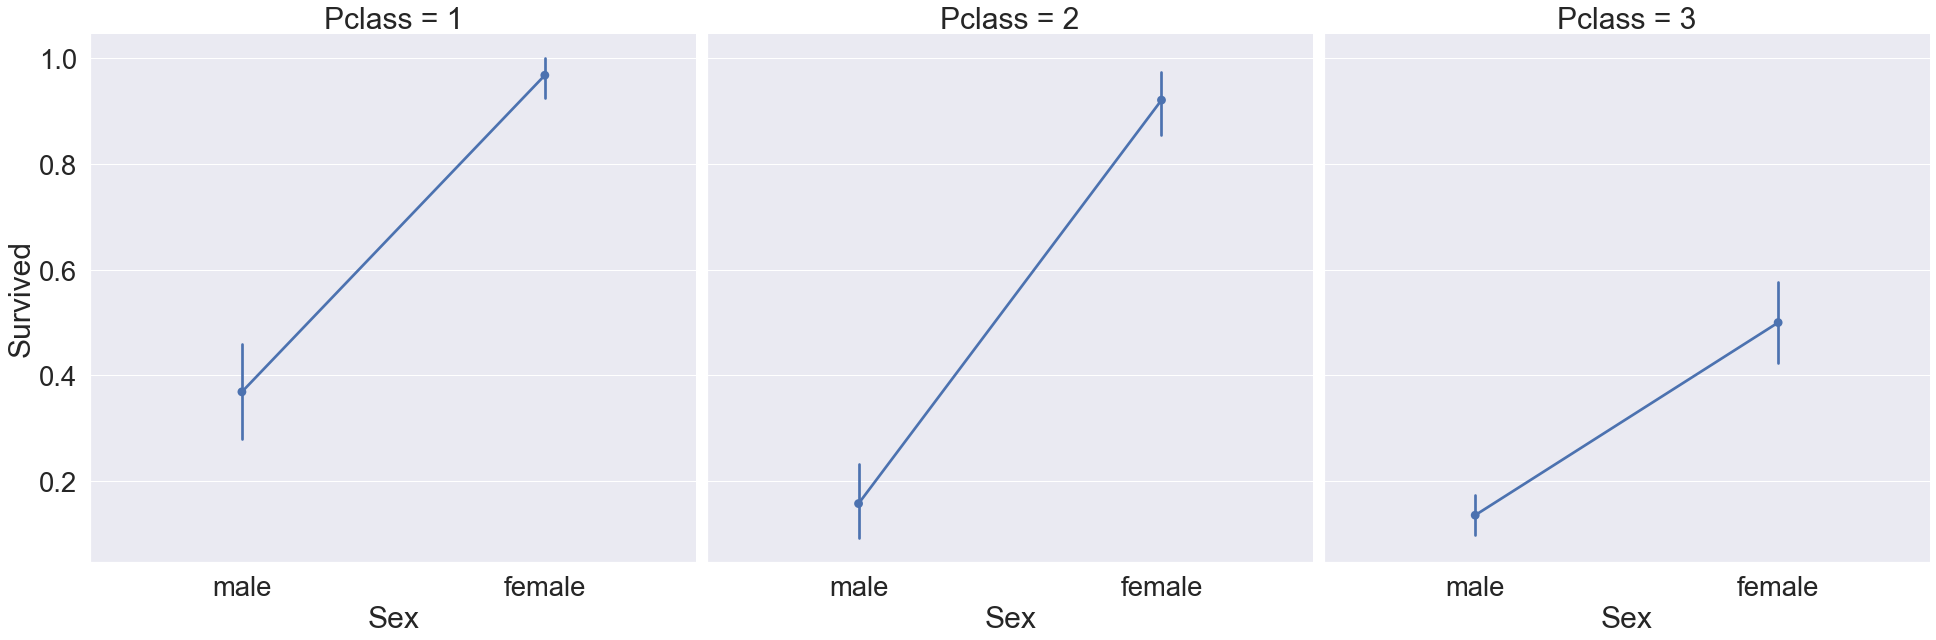

In [273]:
# hue대신 col로 하면 Subplot으로 나누어짐
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data= df_train, 
               saturation = 0.5, size = 9, aspect = 1) 

## 2.4 Age

In [274]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


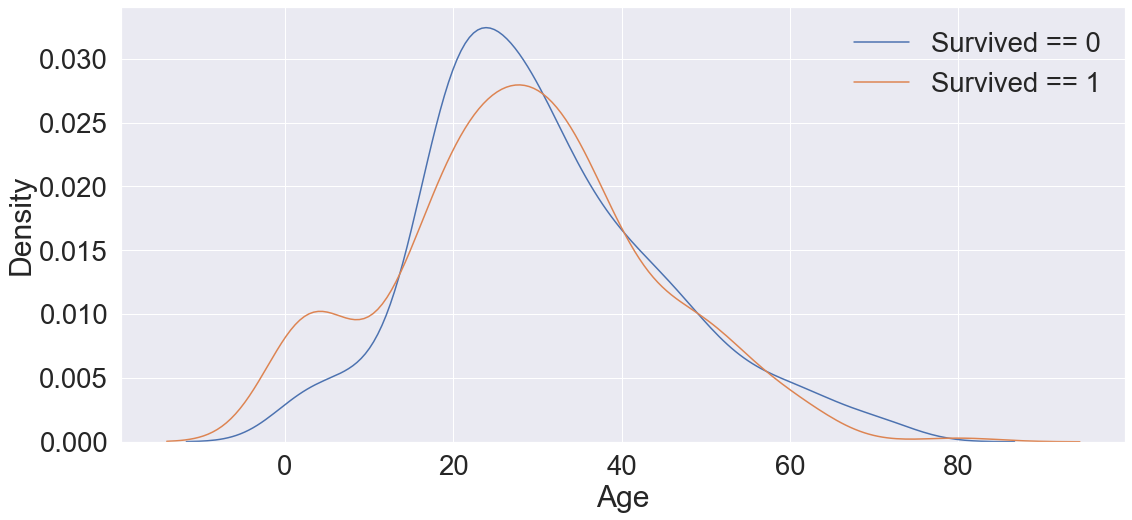

In [275]:
fig, ax = plt.subplots(1,1,figsize = (18,8))
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()

- 생존자 중 나이가 어린사람이 많음

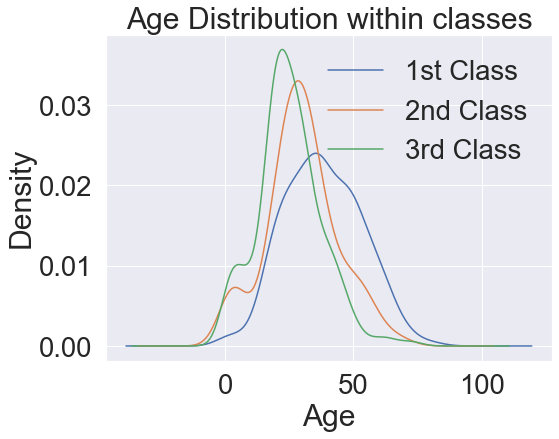

In [276]:
# Pclass에 따른 연령대
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

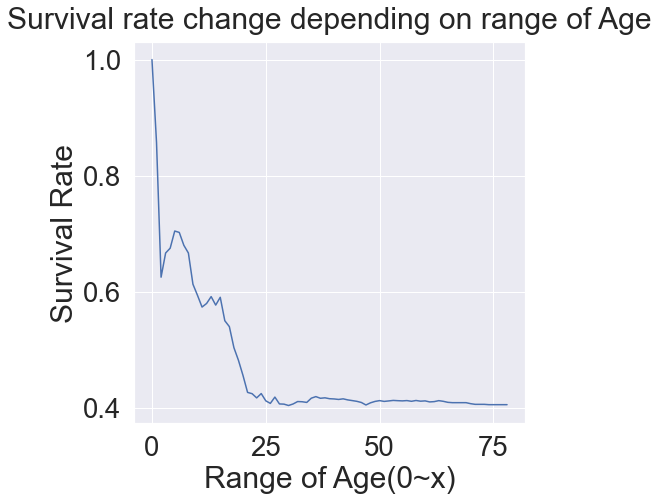

In [277]:
# 연령별로 생존률의 변화 추이 살펴보기
cummulative_survival_ratio = []
for i in range(1,80):
    cummulative_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize = (7,7))
plt.plot(cummulative_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 어릴수록 생존률이 높아짐

---
**배운점: 시각화로 평균, 최대, 최솟값처럼 단순한 통계치를 볼 수 있지만, 연령대의 범위에 따라 생존률 변화추이를 확인함으로서 "어릴수록 생존률이 높다"를 더욱 효과적으로 표현할 수 있었다.**

## 2.5 Pclass, Sex, Age

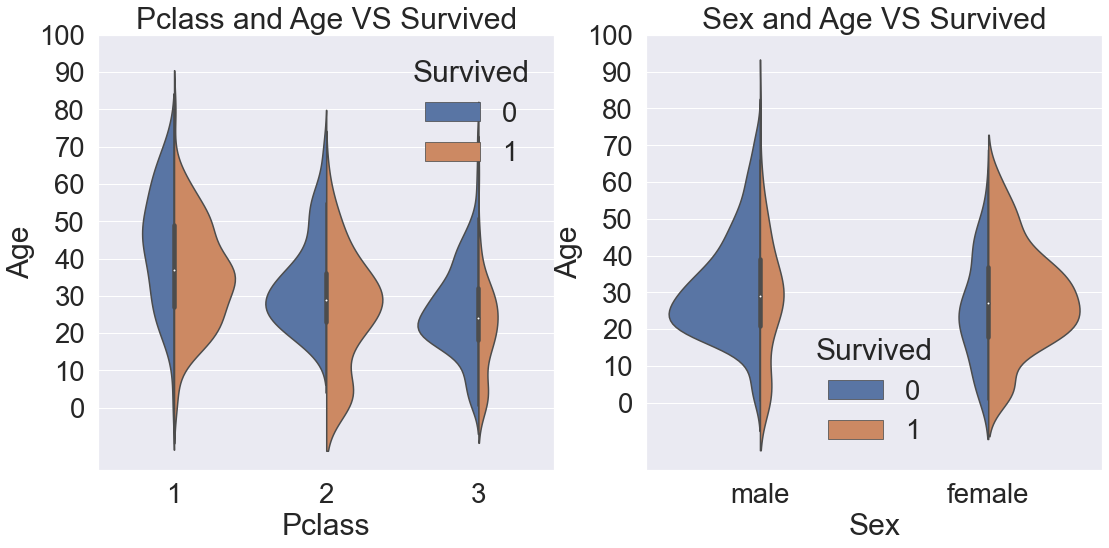

In [278]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
# (Split = True)를 통해 양 사이드에 같이 표현할 수 있다.

# Pclass & Age
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))

# Sex & Age
sns.violinplot('Sex','Age', hue = 'Survived', data= df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽그림은 Pclass와 연령대별로 생존상황을 나타냄
- 오른쪽 그림은 성별과 연령대별로 생존상황을 나타냄
- Pclass가 높을수록 생존률이 높은 성향을 띔
- 여자가 남성보다 월등히 생존률이 높음
- 특히, 여성과 아이를 먼저 챙긴것을 볼 수 있다

## 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

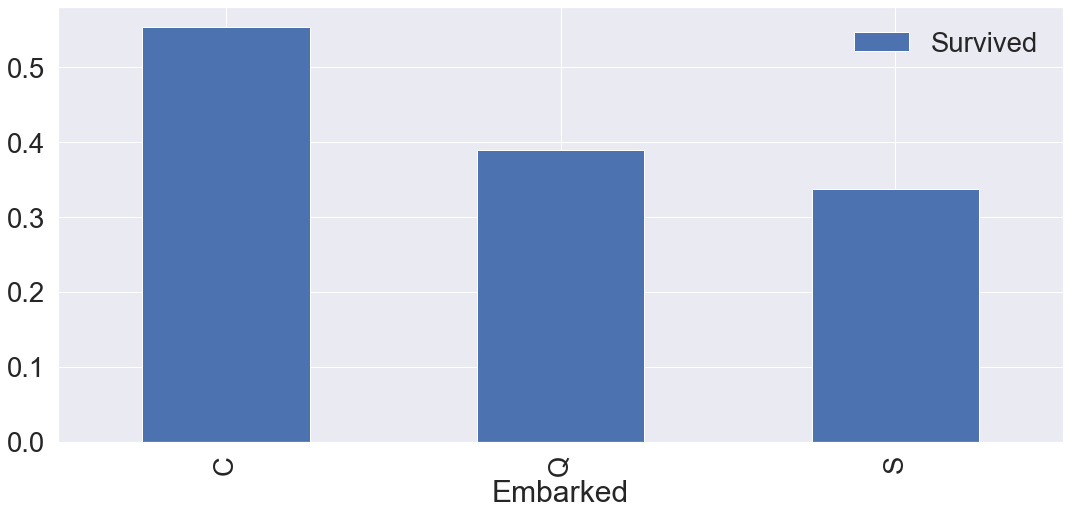

In [279]:
fig, ax = plt.subplots(1,1, figsize = (18,8))
df_train[['Embarked', 'Survived']].groupby('Embarked', as_index = True).mean().sort_values('Survived', ascending = False).plot.bar(ax=ax)

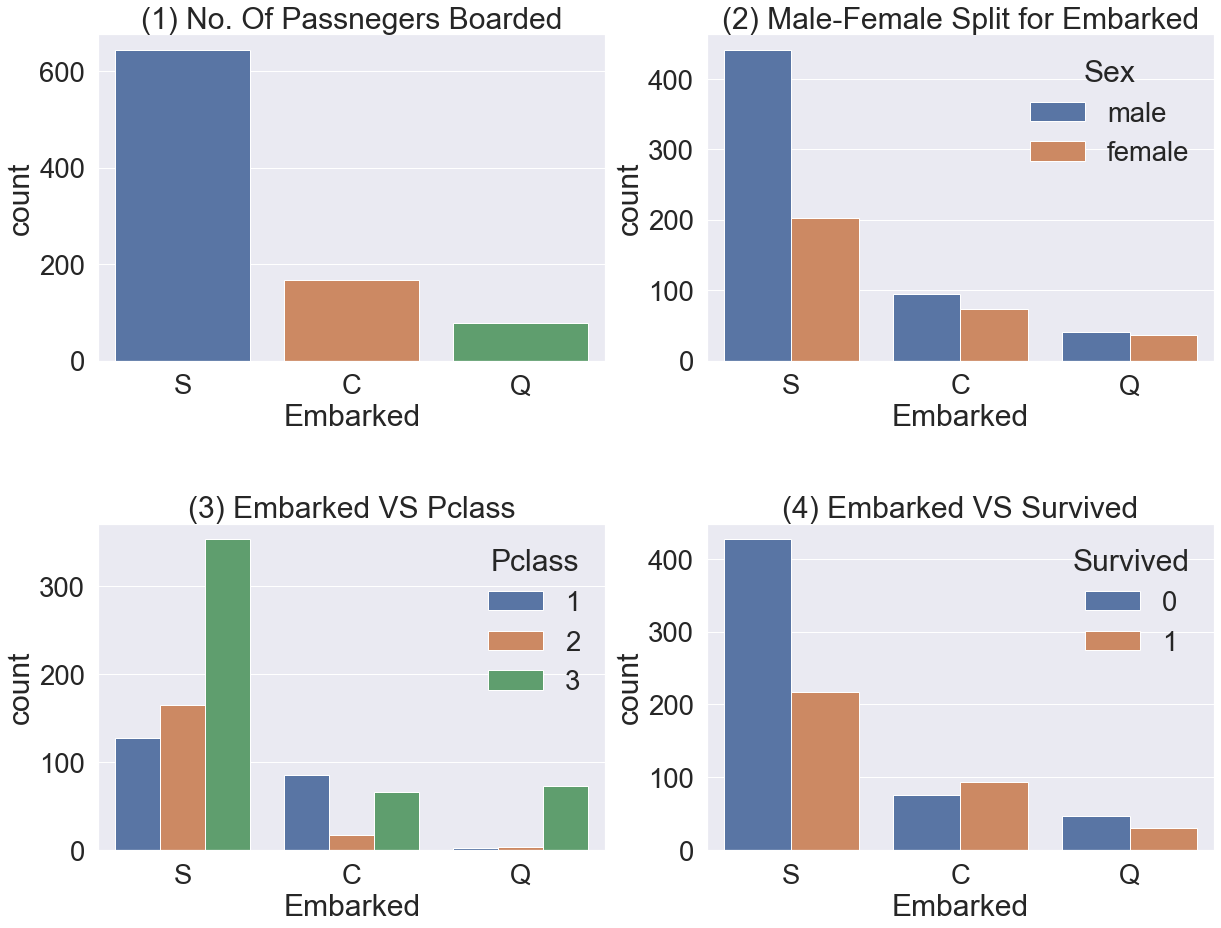

In [280]:
# 다른 Feature로 세분화하여 살펴보기
fig, ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot('Embarked', data= df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No. Of Passnegers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked VS Pclass')

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked VS Survived')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- Figure(1) - S에서 가장 많은 사람 탑승
- Figure(2) - C와 Q는 남여의 비율이 비슷하지만 S는 남성의 비율이 월등히 높음
- Figure(3) - Q는 클래스가 낮은 탑승객이 주로 탔음
- Figure(4) - C의 생존률이 높은 것은 클래스가 1인 탑승객이 많기 때문이고, S는 클래스가 3인 탑승객이 많기에 상대적으로 생존률이 낮다.

## 2.7 Family - SibSp(형제,자매) + Parch(부모, 자녀)

In [281]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신을 포함하해서
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
print('Maximum size of Family: {}'.format(df_train['FamilySize'].max()))
print('Minimum size of Family: {}'.format(df_train['FamilySize'].min()))

Maximum size of Family: 11
Minimum size of Family: 1


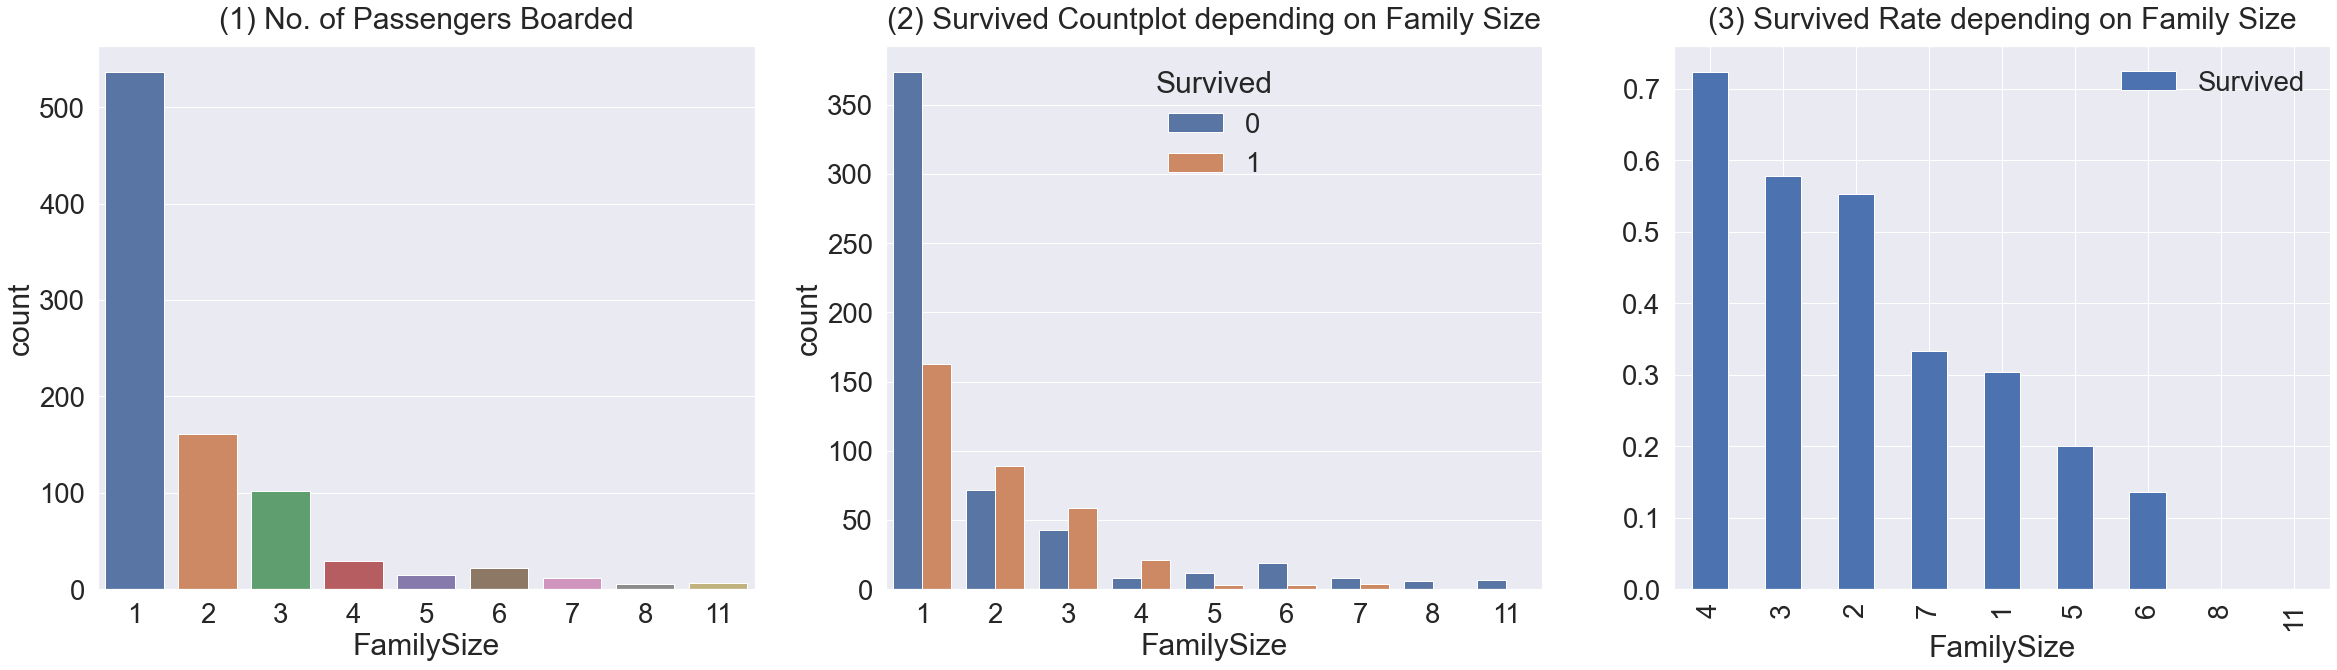

In [282]:
# 가족규모와 생존율의 상관관계
fig, ax = plt.subplots(1,3, figsize = (40,10))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data= df_train, ax = ax[1])
ax[1].set_title('(2) Survived Countplot depending on Family Size', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values('Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived Rate depending on Family Size', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- figure(1) - 가족크기는 1~11까지 분포되어 있으며, 대부분 1~3의 형태를 가지고 있다
- figure(2),(3) - 가족규모가 2~4일때 생존률이 높은 경향이 있다. 즉, 대부분 아내 또는 아이들을 우선시하여 구조한 것으로 보인다.

## 2.8 Fare

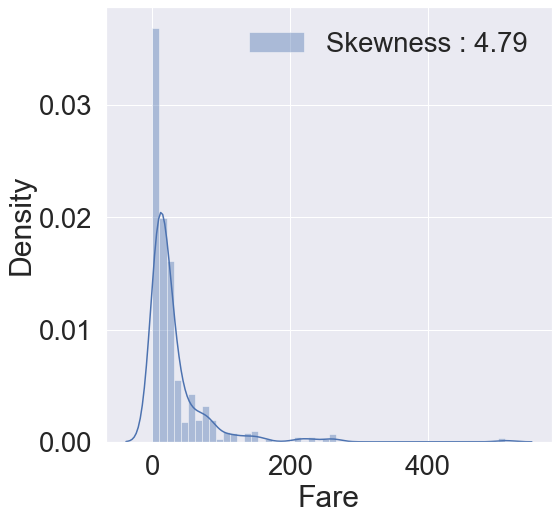

In [283]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

In [284]:
# test데이터에 Fare 결측치를 평균값으로 대체
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

# log값을 취해 Skewness형태를 Normal형태로 변환
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

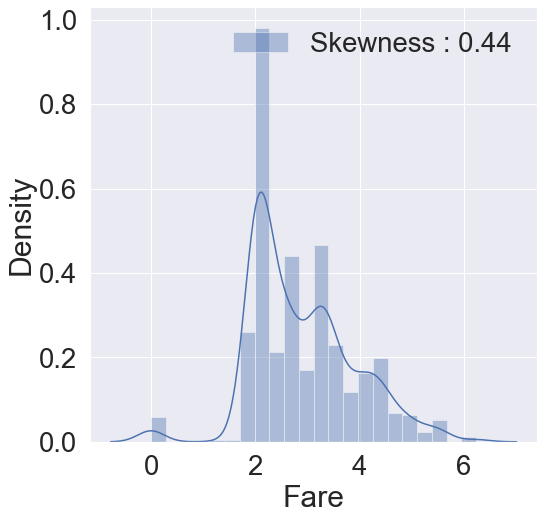

In [285]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

## 2.9 Cabin

- 결측값이 약 80%이므로 해당 Feature로 유의미한 정보를 얻기 힘듦
- 제거

In [286]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

- 결측치는 없지만, string 데이터로 아이디어를 통해서 Feature의 정보를 얻어야하는 부분

In [287]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature Engineering
## 3.1 결측치 처리
### 3.1.1 Age 결측치를 title을 사용하여 처리
- age에는 177개의 결측치가 존재한다.
- title (Miss, Mrr, Mrs, etc) + statistics를 사용하여 해결

In [288]:
# 정규식 (extract 메소드)을 사용하여 title 추출
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # 앞머리 타이틀 추출
df_test['Initial']  = df_test.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r') # Initial과 Sex를 확인

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [289]:
# title별로 특정성별에 맞는 title로 변환
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col', 'Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col', 'Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

<AxesSubplot:xlabel='Initial'>

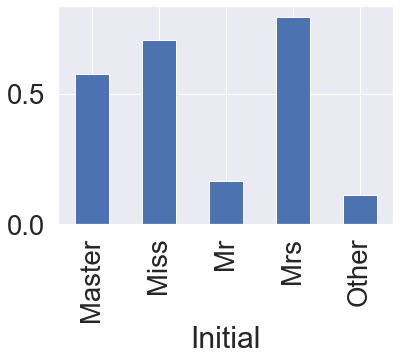

In [290]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [291]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [292]:
df_test.groupby('Initial').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Master,1123.380952,2.714286,7.406471,1.571429,1.380952,3.112730,3.952381
Miss,1100.240506,2.443038,21.774844,0.544304,0.392405,2.927526,1.936709
Mr,1102.471074,2.309917,32.151351,0.272727,0.177686,2.744519,1.450413
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,3.566570,2.430556
Other,1053.500000,1.500000,42.750000,0.500000,0.250000,3.650053,1.750000


In [293]:
# 각 타이틀별 나이 평균값으로 결측치 처리
# Train
df_train.loc[(df_train.Age.isnull())& (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())& (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())& (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())& (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())& (df_train['Initial'] == 'Other'), 'Age'] = 46

# Test
df_test.loc[(df_test.Age.isnull())& (df_test['Initial'] == 'Master'), 'Age'] = 7
df_test.loc[(df_test.Age.isnull())& (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())& (df_test['Initial'] == 'Mr'), 'Age'] = 32
df_test.loc[(df_test.Age.isnull())& (df_test['Initial'] == 'Mrs'), 'Age'] = 39
df_test.loc[(df_test.Age.isnull())& (df_test['Initial'] == 'Other'), 'Age'] = 43

### 3.1.2 Embarked 결측치처리

In [294]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [295]:
# 가장 많은 S로 대체
df_train['Embarked'].fillna('S', inplace = True)

## 3.2 Age를 카테고리형태로 변환

- 숫자형을 카테고리형태로 바꾸면 information loss가 발생할 수도 있지만, 다양한 형태의 feature engineering을 배우기 위해 진행
- 10살 간격으로 나눔

In [296]:
# 1) 조건문을 통한 방법
def Age_to_Category(df):
    df['Age_cat'] = 0
    df.loc[df['Age'] < 10,'Age_cat'] = 0
    df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age_cat'] = 1
    df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age_cat'] = 2
    df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age_cat'] = 3
    df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age_cat'] = 4
    df.loc[(df['Age'] >= 50) & (df['Age'] < 60), 'Age_cat'] = 5
    df.loc[(df['Age'] >= 60) & (df['Age'] < 70), 'Age_cat'] = 6
    df.loc[(df['Age'] >= 70), 'Age_cat'] = 7
    return df

# Train
df_train = Age_to_Category(df_train)

# Test
df_test = Age_to_Category(df_test)

# 2) apply 메소드를 활용하는 방법
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else: 
        return 7
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
df_test['Age_cat_2'] = df_test['Age'].apply(category_age)

In [297]:
print('2가지 방법이 같은 결과값을 내는가? => ',(df_train['Age_cat'] == df_train['Age_cat_2']).all())

2가지 방법이 같은 결과값을 내는가? =>  True


In [298]:
# Age와 중복되는 feature는 제거
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)
df_test.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)

## 3.3 Initial, Embarked, Sex 문자형에서 숫자형으로 변환
- 문자형을 수치화하는 작업을 진행해야 함
- map method를 통해 간단히 할 수 있다


In [299]:
# Initial: 숫자형으로 변환
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})


In [300]:
# Embarked의 값들 확인
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [301]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [302]:
# Embarked: 숫자형으로 변환
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [303]:
# 결측치 처리 확인
df_train['Embarked'].isnull().any()

False

In [304]:
# Sex : 숫자형으로 변환
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

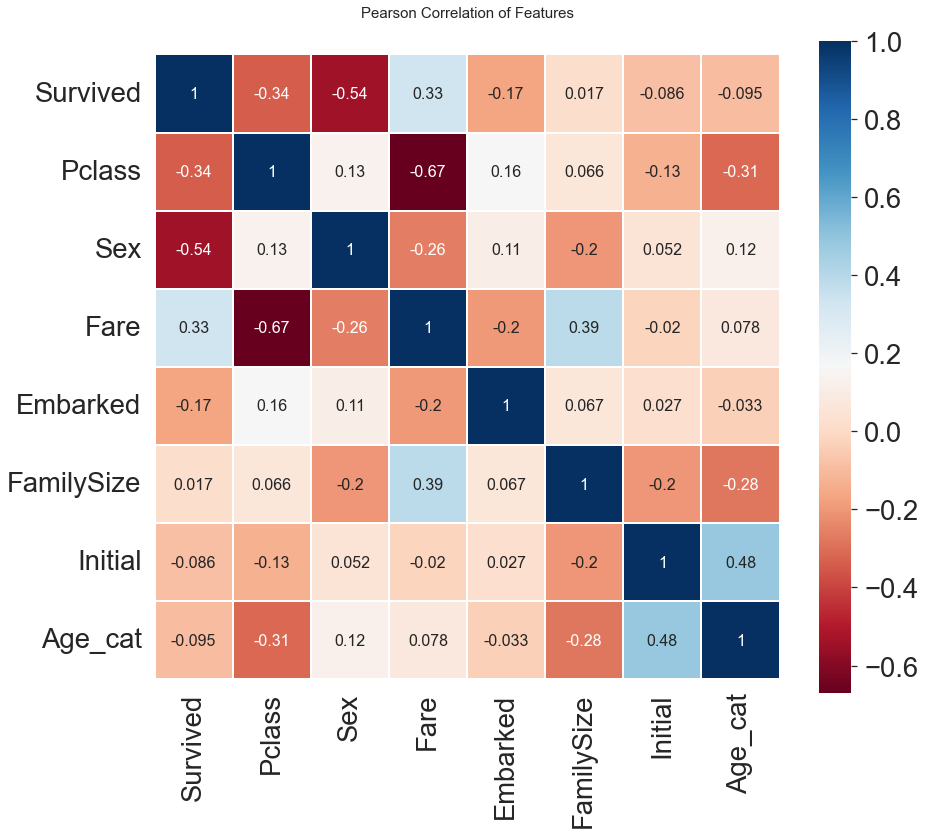

In [305]:
# 상관관계

heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu # 컬러맵 설정
plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax =1.0,
           square = True, cmap=colormap, linecolor='white', annot = True, annot_kws={'size':16})

- Sex, Pclass, Fare가 Survived에 어느정도 상관관계가 있음
- Fare와 Pclass, FamilySize, Embarked는 상관관계를 가지고 있음

## 3.4 One-Hot encoding - Initial과 Embarked
- 카테고리 데이터를 원핫 인코딩을 통해 수치화

In [306]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [307]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


## 3.5 불필요한 컬럼 제거


In [308]:
del_col = ['PassengerId', 'Name', 'SibSp','Parch','Ticket','Cabin']

df_train.drop(del_col, axis = 1, inplace = True)
df_test.drop(del_col, axis = 1, inplace = True)
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [309]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 4 모델링 

In [310]:
from sklearn.ensemble import RandomForestClassifier # 분류모델
from sklearn import metrics # 모델 평가지표
from sklearn.model_selection import train_test_split # 훈련용 테스트셋 나누기


## 4.1 데이터셋 준비단계 - Train, Test, Validation

In [311]:
# 타겟값 분리
X_train = df_train.drop(['Survived'], axis =1).values # 데이터프레임에서 array로 저장
target_label = df_train['Survived'].values
X_test = df_test.values


In [312]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)


## 4.2 모델훈련 및 예측

In [313]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


## 4.3 Feature Importance
- 학습된 모델을 기본으로 특성중요도를 얻을 수 있다.

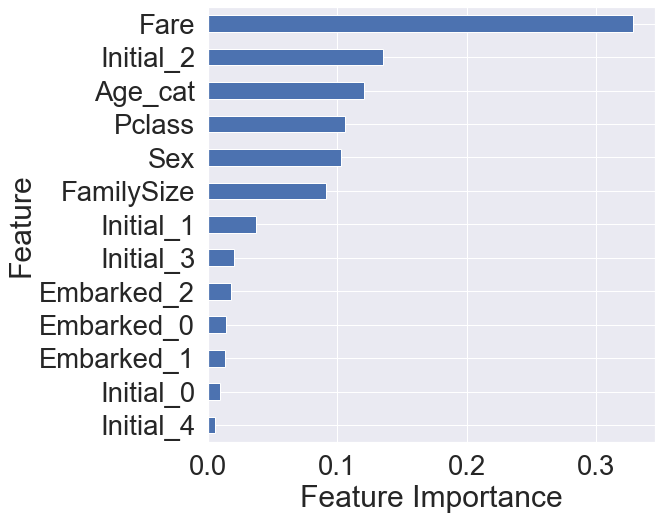

In [314]:
from pandas import Series

# 특성중요도 추출 
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns) # Series 형태로 저장

# 시각화
plt.figure(figsize = (8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


## 4.4 Prediction on the Test
- 주어진 테스트셋을 토대로 예측진행

In [316]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [317]:
prediction = model.predict(X_test)
submission['Survived'] = prediction
submission.to_csv('titanic_submission.csv', index = False)